In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets, metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
import umap
%matplotlib inline

In [3]:
df = pd.read_csv('london_merged.csv')

I'm reading in london cycling data

In [4]:
for i in df:
    print ('{} is type{}'.format(i,df[i].dtype))
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
for i in df:
    if df[i].dtype == object:
        del df[i]

timestamp is typeobject
cnt is typeint64
t1 is typefloat64
t2 is typefloat64
hum is typefloat64
wind_speed is typefloat64
weather_code is typefloat64
is_holiday is typefloat64
is_weekend is typefloat64
season is typefloat64


cleaning the data

In [5]:
cluster_1x = df.t1
cluster_1y = df.cnt
cluster_1 = np.concatenate([cluster_1x.values.reshape(-1,1),cluster_1y.values.reshape(-1,1)], axis=1)

cluster_2x = df.wind_speed
cluster_2y = df.cnt
cluster_2 = np.concatenate([cluster_2x.values.reshape(-1,1),cluster_2y.values.reshape(-1,1)], axis=1)

all_data = np.concatenate([cluster_1,cluster_2],axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

applying the Standard Scaler to our data.
t1 is what the temperature is
t2 is what the temperature feels like
cnt is the number of bike shares
wind_speed is wind speed
season is which season (0,1,2,3)


234 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


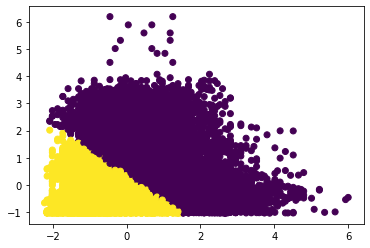

In [6]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()

In [7]:

X = df.drop('season', axis = 1)
y = df.season
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

ypred = pd.DataFrame()

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

PCA Dimensionality reduction

   principal component 1  principal component 2  season
0              -2.965900               0.111300     3.0
1              -2.809854              -0.498829     3.0
2              -3.073505              -0.699138     3.0
3              -3.294338              -0.674920     3.0
4              -3.111160              -0.533568     3.0


<Figure size 720x360 with 0 Axes>

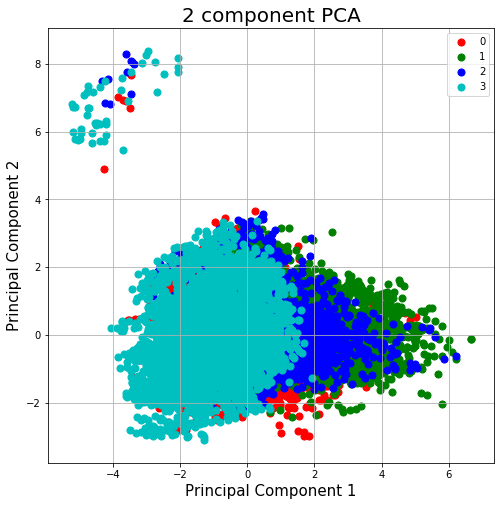

In [10]:
#Replicate this one
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_std)
f = plt.figure(figsize=(10,5))
principalDf = pd.DataFrame(data = pca_components, columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['season']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
print(finalDf.head())
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['season'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

t-SNE dimensionality reduction

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 17414 samples in 0.021s...
[t-SNE] Computed neighbors for 17414 samples in 0.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17414
[t-SNE] Computed conditional probabilities for sample 2000 / 17414
[t-SNE] Computed conditional probabilities for sample 3000 / 17414
[t-SNE] Computed conditional probabilities for sample 4000 / 17414
[t-SNE] Computed conditional probabilities for sample 5000 / 17414
[t-SNE] Computed conditional probabilities for sample 6000 / 17414
[t-SNE] Computed conditional probabilities for sample 7000 / 17414
[t-SNE] Computed conditional probabilities for sample 8000 / 17414
[t-SNE] Computed conditional probabilities for sample 9000 / 17414
[t-SNE] Computed conditional probabilities for sample 10000 / 17414
[t-SNE] Computed conditional probabilities for sample 11000 / 17414
[t-SNE] Computed conditional probabilities for sample 12000 / 17414
[t-SNE] Computed conditional probabilities for sa

<Figure size 720x360 with 0 Axes>

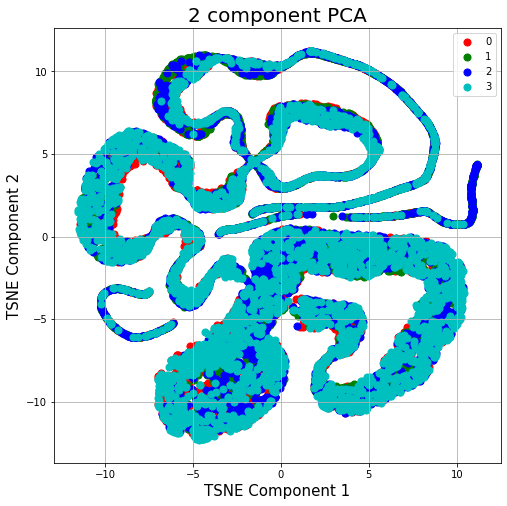

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
f = plt.figure(figsize=(10,5))
principalDf = pd.DataFrame(data = tsne_results, columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['season']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['season'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Dimensionality Reduction with UMAP

C:\Users\mattb\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\Users\mattb\AppData\Local\Continuum\anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnost

<Figure size 720x360 with 0 Axes>

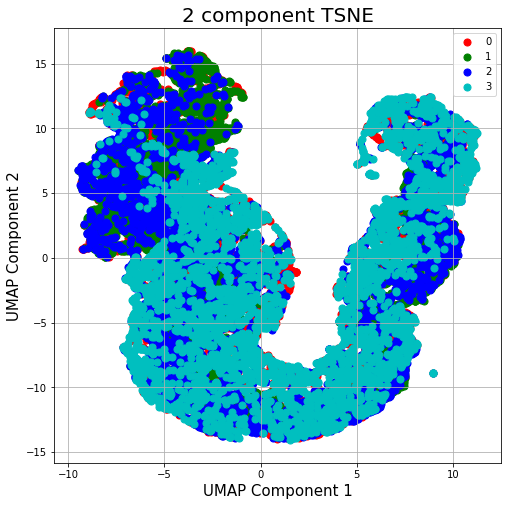

In [12]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)
f = plt.figure(figsize=(10,5))
principalDf = pd.DataFrame(data = umap_results, columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['season']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP Component 1', fontsize = 15)
ax.set_ylabel('UMAP Component 2', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['season'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

DBSCAN

<Figure size 720x360 with 0 Axes>

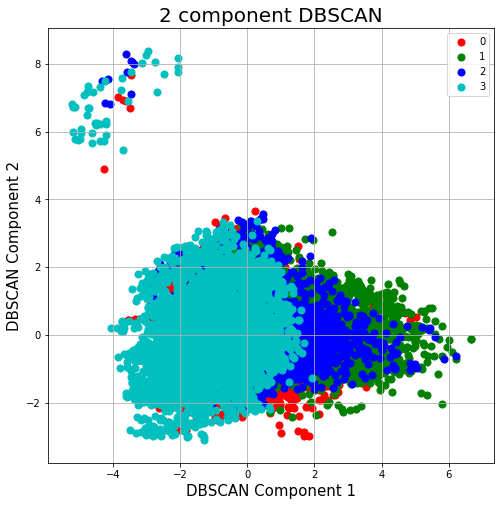

In [19]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

f = plt.figure(figsize=(10,5))
principalDf = pd.DataFrame(data = pca, columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['season']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DBSCAN Component 1', fontsize = 15)
ax.set_ylabel('DBSCAN Component 2', fontsize = 15)
ax.set_title('2 component DBSCAN', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['season'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Now doing Gaussian Mixture models

<Figure size 720x360 with 0 Axes>

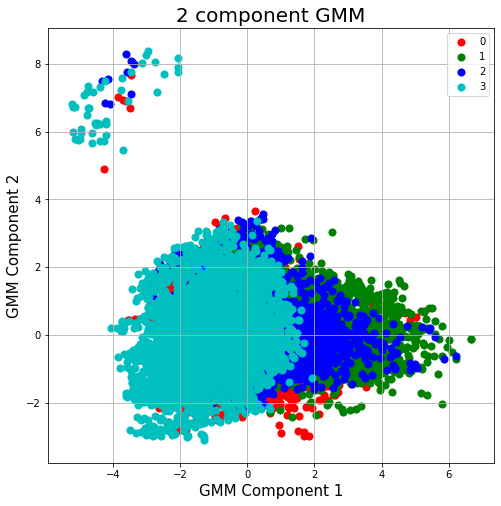

In [20]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

f = plt.figure(figsize=(10,5))
principalDf = pd.DataFrame(data = pca, columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['season']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('GMM Component 1', fontsize = 15)
ax.set_ylabel('GMM Component 2', fontsize = 15)
ax.set_title('2 component GMM', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['season'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()